# An application: classifying data points using norms

In this section, we demonstrate a simple application of norms as a classification method. We begin by defining the setup: we have $n$ data points $\{(\boldsymbol{x}_1,y_1),\dots,(\boldsymbol{x}_n, y_n)\}$ where $\boldsymbol{x}_i\in \mathbb{R}^d$ is a feature and $y_i \in \{0,1\}$ is a label. The goal is to find a classifier which, given an input (i.e. a vector in $\mathbb{R}^d$) can correctly predict the label 0 or 1.

For the purpose of this example, we consider the following dataset, which can be generated using the `sklearn` package in Python:

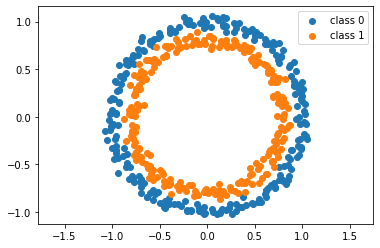

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_circles(n_samples=500, noise=0.04)

for label in [0,1]:
    plt.scatter(X[y==label,0], X[y==label, 1], label=f'class {label}')

plt.axis('equal')
plt.legend()
plt.show()

Here we will attempt to develop a classifier which predicts a label for a datapoint $\boldsymbol{x}$ based on its $2$-norm. Specifically, we will consider classifiers of the form

$$
C_t(\boldsymbol{x}) = \begin{cases}1 & \text{if }\|\boldsymbol{x}\|_2 \leq t\\ 0 & \text{if } \|\boldsymbol{x}\|_2 > t\end{cases}
$$

where the threshold $t$ is to be determined. To see why this is a natural form of classifier to use, remember that the $2$-ball at radius $t$ is exactly a circle in $\mathbb{R}^2$, and since the data shown above are in the form of concentric circles, it makes sense that thresholding on the $2$-norm may give good classification performance.

It remains to determine the best value of threshold $t$ to use. To do this, we will try many values of $t$, and pick the one that makes the fewest mistakes on the dataset.

First, we define a function `predict(X, y, t)` which takes in data `X,y` and a given threshold `t`, and returns the misclassification rate for the $2$-norm classifier with threshold $t$. The misclassification rate is just the fraction of datapoints that are misclassified by $C_t$:

$$
\text{Misclassification Rate} = \frac{1}{n}\sum_{i=1}^n \mathbb{1}(C_t(\boldsymbol{x}_i)\neq y_i).
$$

The function is defined as follows.

In [2]:
import numpy as np

def predict(X, y, t):
    # get the norm of each data point
    norms = np.linalg.norm(X, axis=1)

    # get predictions by evaluating if the point
    # is above or below the threshold t
    predictions = (norms <= t).astype(int)

    # get the misclassification percentage
    error = np.mean(predictions != y)
    return error

Next, we will evaluate the model at a variety of values of threshold $t$, and find which one has the lowest misclassification rate.

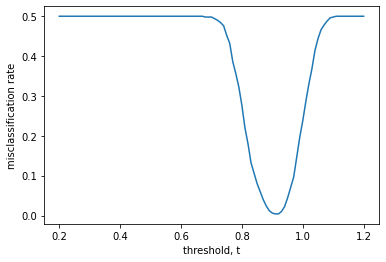

In [3]:
t_range = np.arange(0.2,1.21,.01)

errors = []
for t in t_range:
    err = predict(X, y, t)
    errors.append(err)

plt.plot(t_range, errors)
plt.xlabel('threshold, t')
plt.ylabel('misclassification rate')
plt.show()

From the plot, we find that the best threshold is $t\approx 0.89$, and that at this value, the misclassification rate is $0.01$, or $1\%$.